In [233]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [234]:
# loading the downloaded csv file
df = pd.read_csv('who_suicide_statistics.csv')


In [235]:
# first five rows
df.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.00
1,Albania,1985,female,25-34 years,NaN,246800.00
2,Albania,1985,female,35-54 years,NaN,267500.00
3,Albania,1985,female,5-14 years,NaN,298300.00
4,Albania,1985,female,55-74 years,NaN,138700.00


In [236]:
# checking the column names

print("The name of the column is: ")
for column in df.columns:
    print(f"'{column}' ")



The name of the column is: 
'country' 
'year' 
'sex' 
'age' 
'suicides_no' 
'population' 


In [237]:
# checking the data type of each column

print("The data type of each column is: ")
df.dtypes

The data type of each column is: 


country         object
year             int64
sex             object
age             object
suicides_no    float64
population     float64
dtype: object

In [238]:
# check for the number of rows and columns

# The number of rows in dataset is 
print(f"The number of rows in our dataset is =  '{df.shape[0]}' \n")
# The number of column in our dataset is
print(f"The number of columns in our dataset is = '{ df.shape[1]}'")

The number of rows in our dataset is =  '43776' 

The number of columns in our dataset is = '6'


---
### **Observation:** 

- Our dataset has 6 coulmns in which three of them are catagorical and three are numeric.

- Columns like `country` , 'sex' , 'age' have object data type whereas `year` has int data type. In contrast to that both `suicides_no` and `population` have float data type.

- The number of rows in our dataset is 43776
---

In [239]:
# check for the value counts in country column

df['country'].nunique()

141

---

We have a record of total 141 countries across the globe.

---

In [240]:
# check for the unique values in each column

df['year'].unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 1983, 1984,
       2016, 1979, 1980, 1981, 1982], dtype=int64)

In [241]:
# getting count of unqiue values in year column

df.year.nunique()

38

---

We have data which spans over 38 years since 1985. to 2016


---

In [242]:
# check for the unique values count in sex column

df.sex.value_counts()

sex
female    21888
male      21888
Name: count, dtype: int64

---

Out of total `43776` records in our dataset have of them are male and half of them are females

---


In [243]:
# check for how many unique age groups we have

df['age'].unique()


array(['15-24 years', '25-34 years', '35-54 years', '5-14 years',
       '55-74 years', '75+ years'], dtype=object)

---

As we can see we have six age groups

|No. | Age Group |
| --- | --- |
| 1 | 5-14 years |
| 2 | 15-24 years |
| 3 | 25-34 years |
| 4 | 35-54 years |
| 5 | 55-74 years |
| 6 | 75+ years |
---

In [244]:
# checking the count of unique values of each age group

pd.DataFrame(df.age.value_counts())

,count
age,
15-24 years,7296
25-34 years,7296
35-54 years,7296
5-14 years,7296
55-74 years,7296
75+ years,7296


---

All the age groups in our dataset have equal number of records each age group contains 7296 records

----



In [245]:
# check for the null values in the dataset

df.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

---

As we can see `suicides_no` and `population` columns have null values in our dataset. `suicides_no` have nan values `2256` and `population` have nan values `5460`

---

In [246]:
# to show values in float format

pd.options.display.float_format = '{:.2f}'.format

In [247]:
# applying descriptive statistics

df.describe()

,year,suicides_no,population
count,43776.00,41520.00,38316.00
mean,1998.50,193.32,1664091.14
std,10.34,800.59,3647231.23
min,1979.00,0.00,259.00
25%,1990.00,1.00,85112.75
50%,1999.00,14.00,380655.00
75%,2007.00,91.00,1305698.00
max,2016.00,22338.00,43805214.00


In [248]:
# The country with lowest population

df[df['population'] == df['population'].min()]

,country,year,sex,age,suicides_no,population
32351,Rodrigues,2004,male,75+ years,0.00,259.00


In [249]:
# The country with highest population

df[df['population'] == df['population'].max()]

,country,year,sex,age,suicides_no,population
42242,United States of America,2006,female,35-54 years,3376.00,43805214.00


In [250]:
# The country with max suicide rate

df[df['suicides_no'] == df['suicides_no'].max()]

,country,year,sex,age,suicides_no,population
33128,Russian Federation,1994,male,35-54 years,22338.00,19044200.00


---

- The country with minimum population in our dataset is `Rodrigues` and with maximum population is `United States of America`.
- ` Russian Federation ` has highest suicide rate in 1994 among 35-54 years age group.

---


In [251]:
# count of suicide in different age groups

age_group_wise_suicides = df.groupby('age')['suicides_no'].sum()

# aranging the results in ascending order

age_group_wise_suicides.sort_values(ascending=True)


age
5-14 years      63312.00
75+ years      757667.00
15-24 years    984287.00
25-34 years   1367333.00
55-74 years   1958468.00
35-54 years   2895388.00
Name: suicides_no, dtype: float64

## **Pie_Chart:** 
###  **Age Group Wise Suicide Percentage**

In [252]:
# defining the funtion for plotting pie chart

def plot_pie_chart(age_group_wise_suicides):
    
    # defining the figure size ad dpi
    plt.figure(figsize=(10, 10), dpi=300)

    # defining labels as unique enteries of age column
    label =  df.age.unique()
    # count of suicide in different age groups
    age_group_wise_suicides = df.groupby('age')['suicides_no'].sum()
    # plotting the pie chart
    plt.pie(age_group_wise_suicides, 
            labels= label, # defining the labels 
            autopct='%1.1f%%', # showing the percentage with 1 decimal place
            explode=[0.1]*len(age_group_wise_suicides), # exploding the results
            textprops={'fontsize': 15} # setting font size for labels and percentage
        )
    
    # defining title and font size for title 
    plt.title('Suicide Percentage of Different Age Groups' , fontsize = 18)
    plt.show()

    return

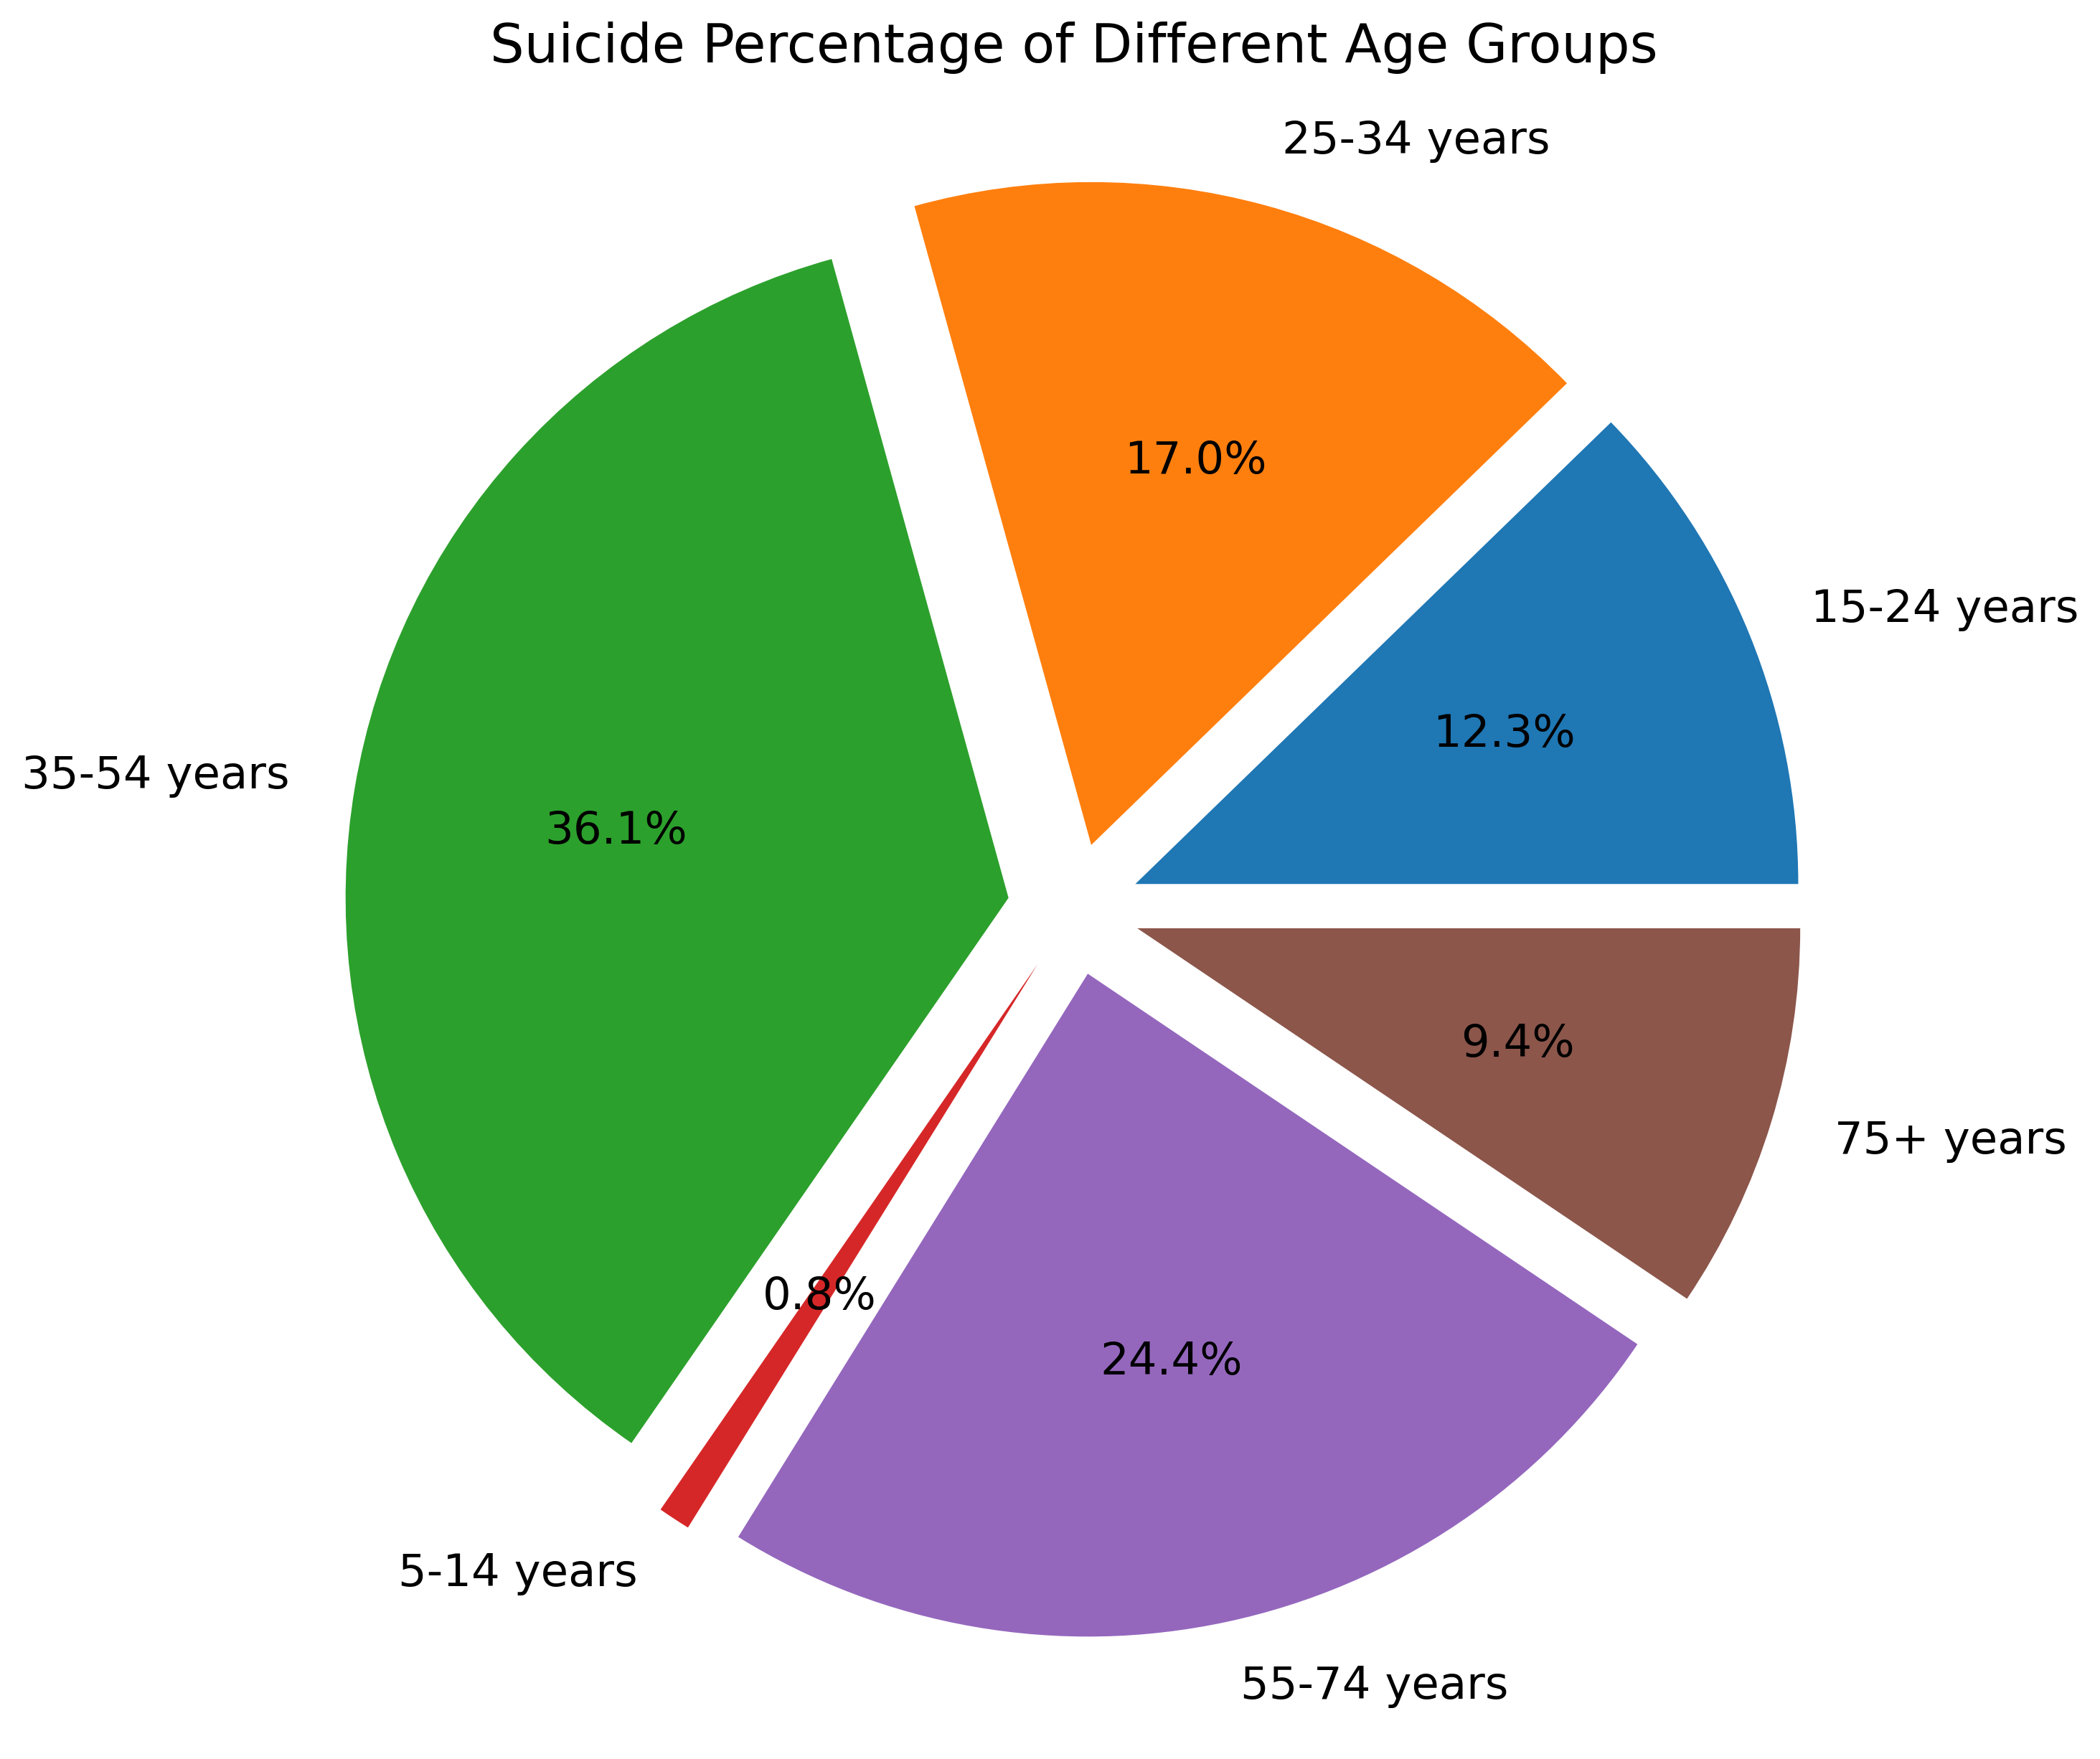

In [253]:
# calling the function to plot pie chart
plot_pie_chart(age_group_wise_suicides)

---

- As all the age groups have equall number of representation in our records but as we can see the age group `5-14 years` has lowest number of suicides
- Whereas `35-54 years` has highest number of suicides.

---

## **Bar_Chart:** 
###  **Percentage of Male and Female Suicide**

In [254]:
# male suicide count

male_suicide = df[df['sex'] == 'male']['suicides_no'].sum()

# male suicide rate
percent_male_suicide = (male_suicide / df['suicides_no'].sum()) * 100

# printing out the results
print(f'percent_male_suicide = {round(percent_male_suicide , 2)}')

percent_male_suicide = 76.3


In [255]:
# male suicide count

female_suicide = df[df['sex'] == 'female']['suicides_no'].sum()

# male suicide rate
percent_female_suicide = (female_suicide / df['suicides_no'].sum()) * 100

# printing out the results
print(f'percent_female_suicide = {round(percent_female_suicide , 2)}')

percent_female_suicide = 23.7


In [256]:
def percent_suicide():
    
    # defining the dpi
    plt.figure(figsize=(10, 5), dpi=300) 

    # defining color for each bar 
    bar_colors = ['pink', 'blue']

    # Plot the bar chart
    plt.bar(['female percentage', 'male percentage'], 
        [percent_female_suicide, percent_male_suicide],
        color=bar_colors , edgecolor='black')
    
    # setting x labels
    plt.xlabel('Gender')

    # setting y label
    plt.ylabel('suicide percentage')

    # definig title
    plt.title('suicide percentage of both gender')

    # Show the plot
    plt.show()
    
    return

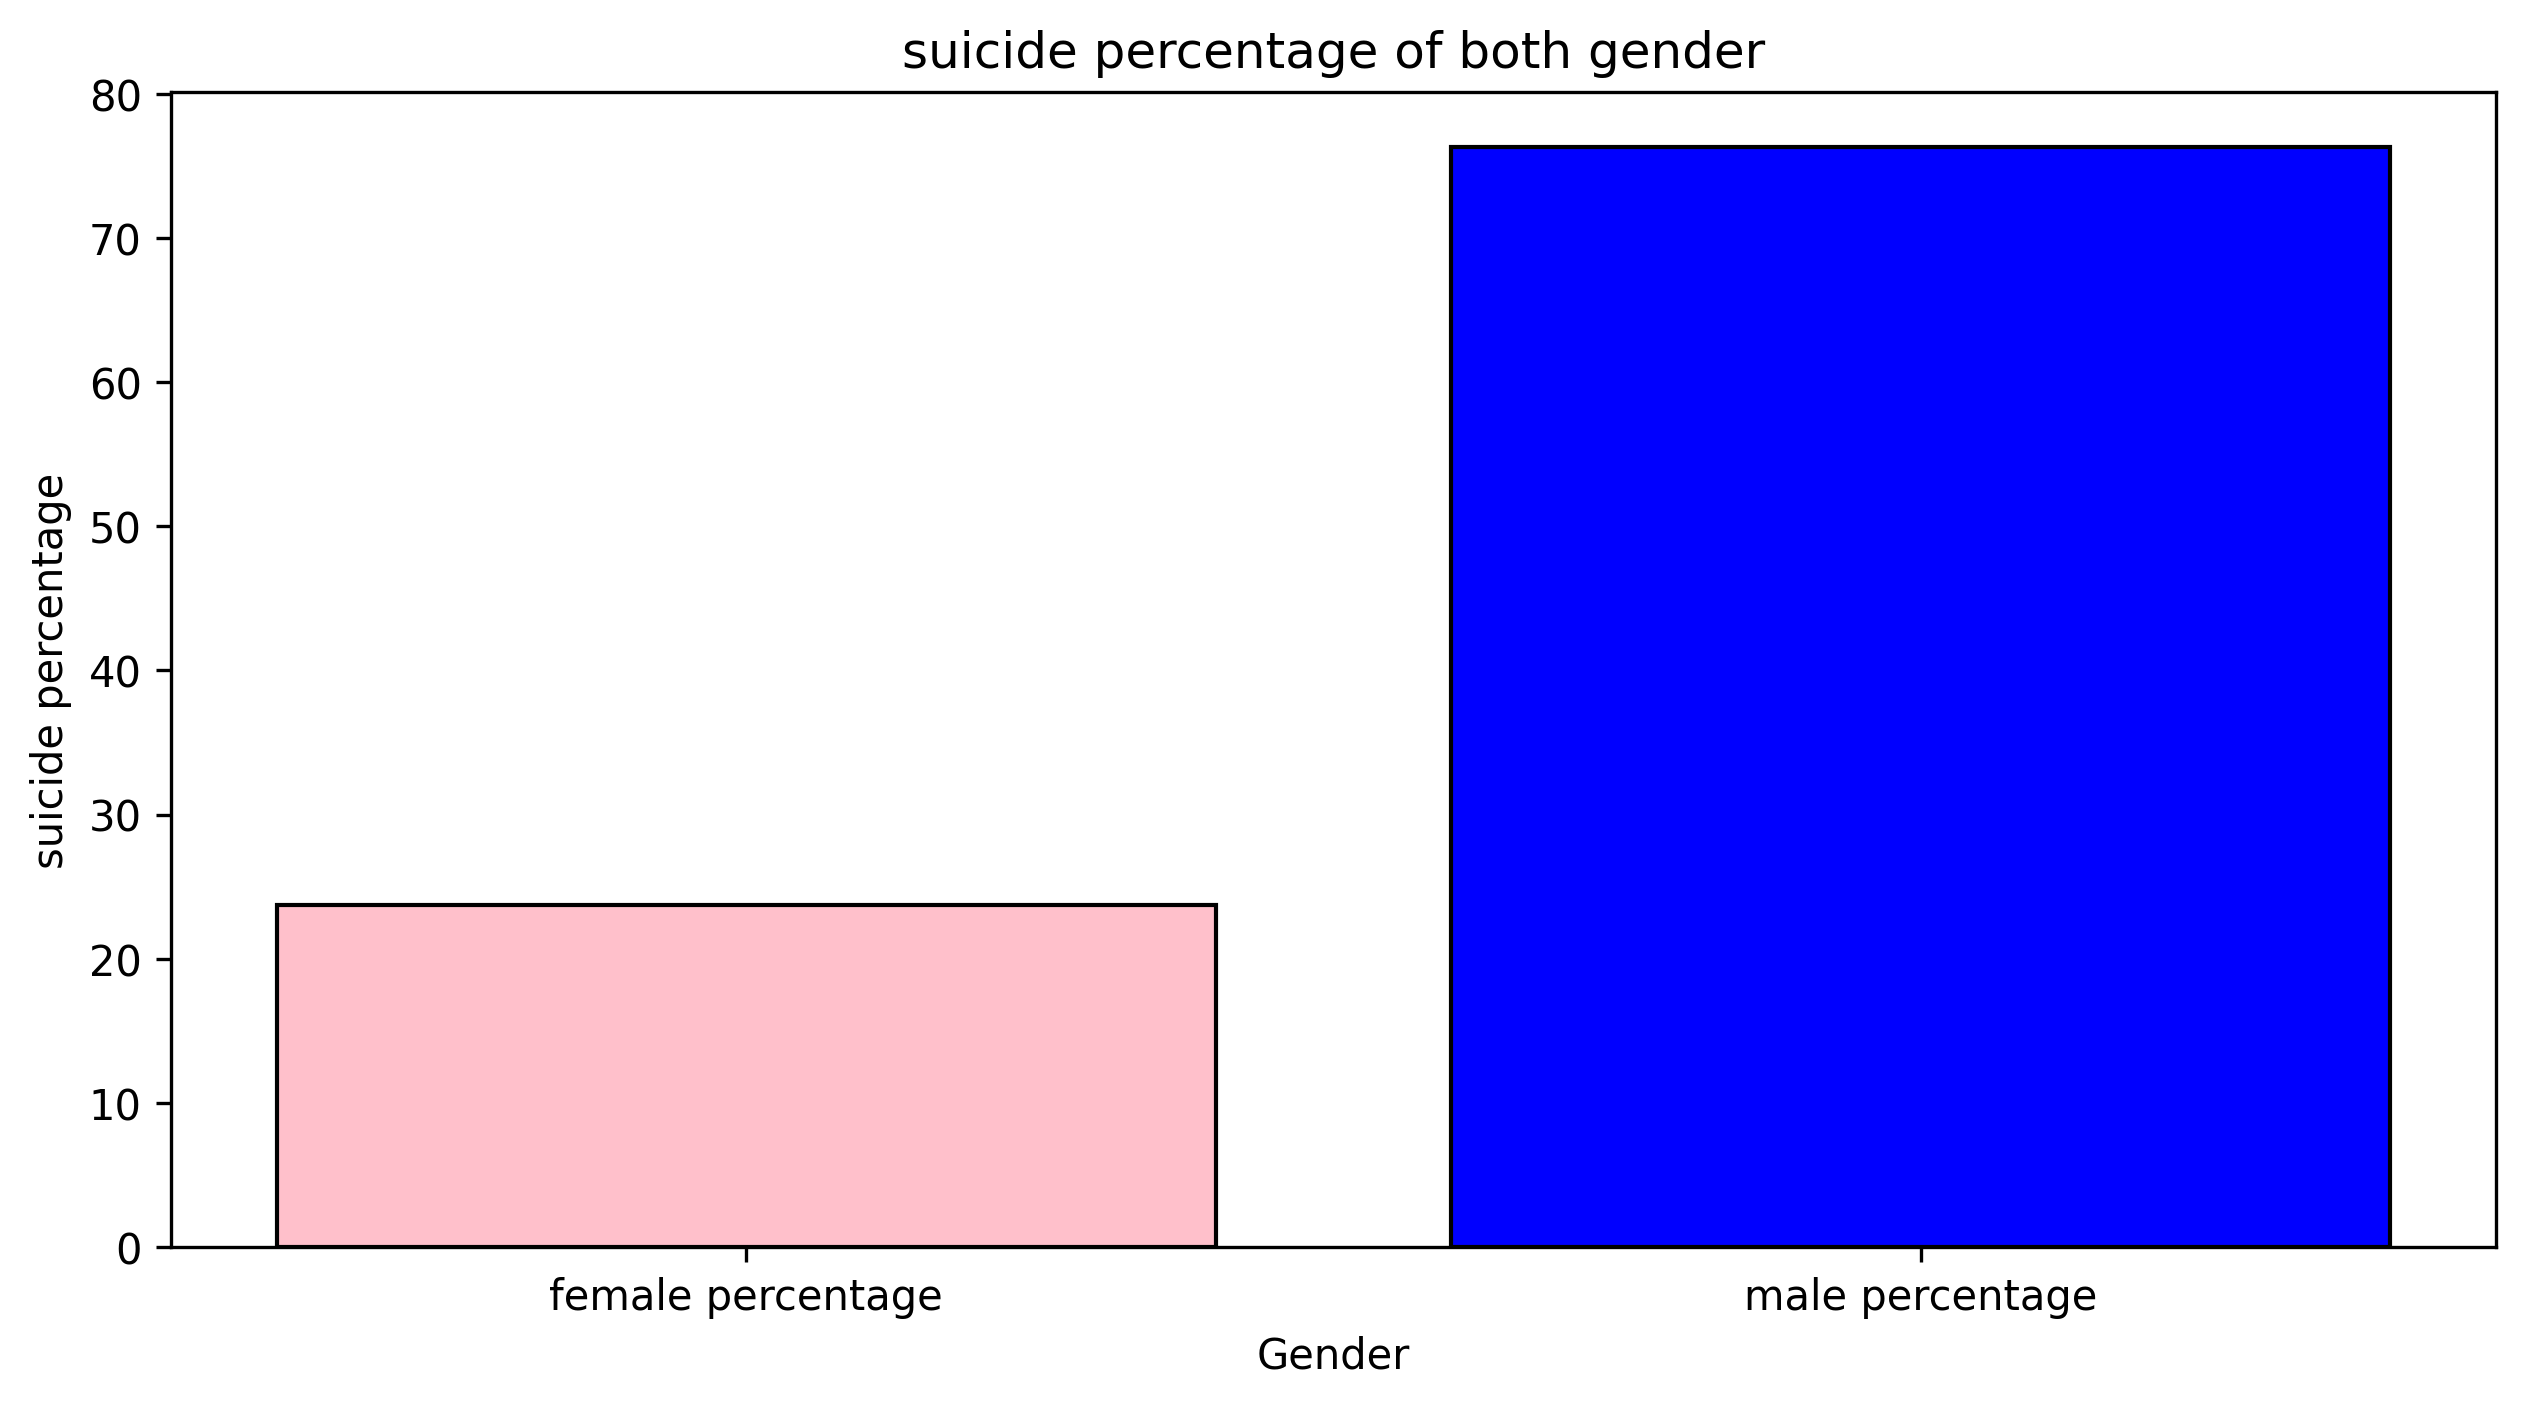

In [257]:
# calling the function to plot the bar chart
percent_suicide()

## **Heat Map:**
### **Correlation Matrix**

In [258]:
# selecting only int and float columns from the dataframe
num_cols = df.select_dtypes(include=['int64', 'float64'])

# calculating the correlation matrix
corr_matrix = num_cols.corr(method='pearson')

# printig out the results
corr_matrix


,year,suicides_no,population
year,1.00,-0.01,0.03
suicides_no,-0.01,1.00,0.61
population,0.03,0.61,1.00


In [259]:
# defining the funtion for plotting heatmap
def heatmap(corr_matrix):
    plt.figure(figsize=(10, 5), dpi=300)
    # creating mask for the correlation matrix
    mask = np.triu(np.ones_like(corr_matrix))
    # plotting the heatmap by excluding the redundant values
    sns.heatmap(corr_matrix, annot=True , cmap='viridis' , mask=mask , vmax=1, vmin=-1)
    plt.title('Heatmap of correlation matrix')
    return

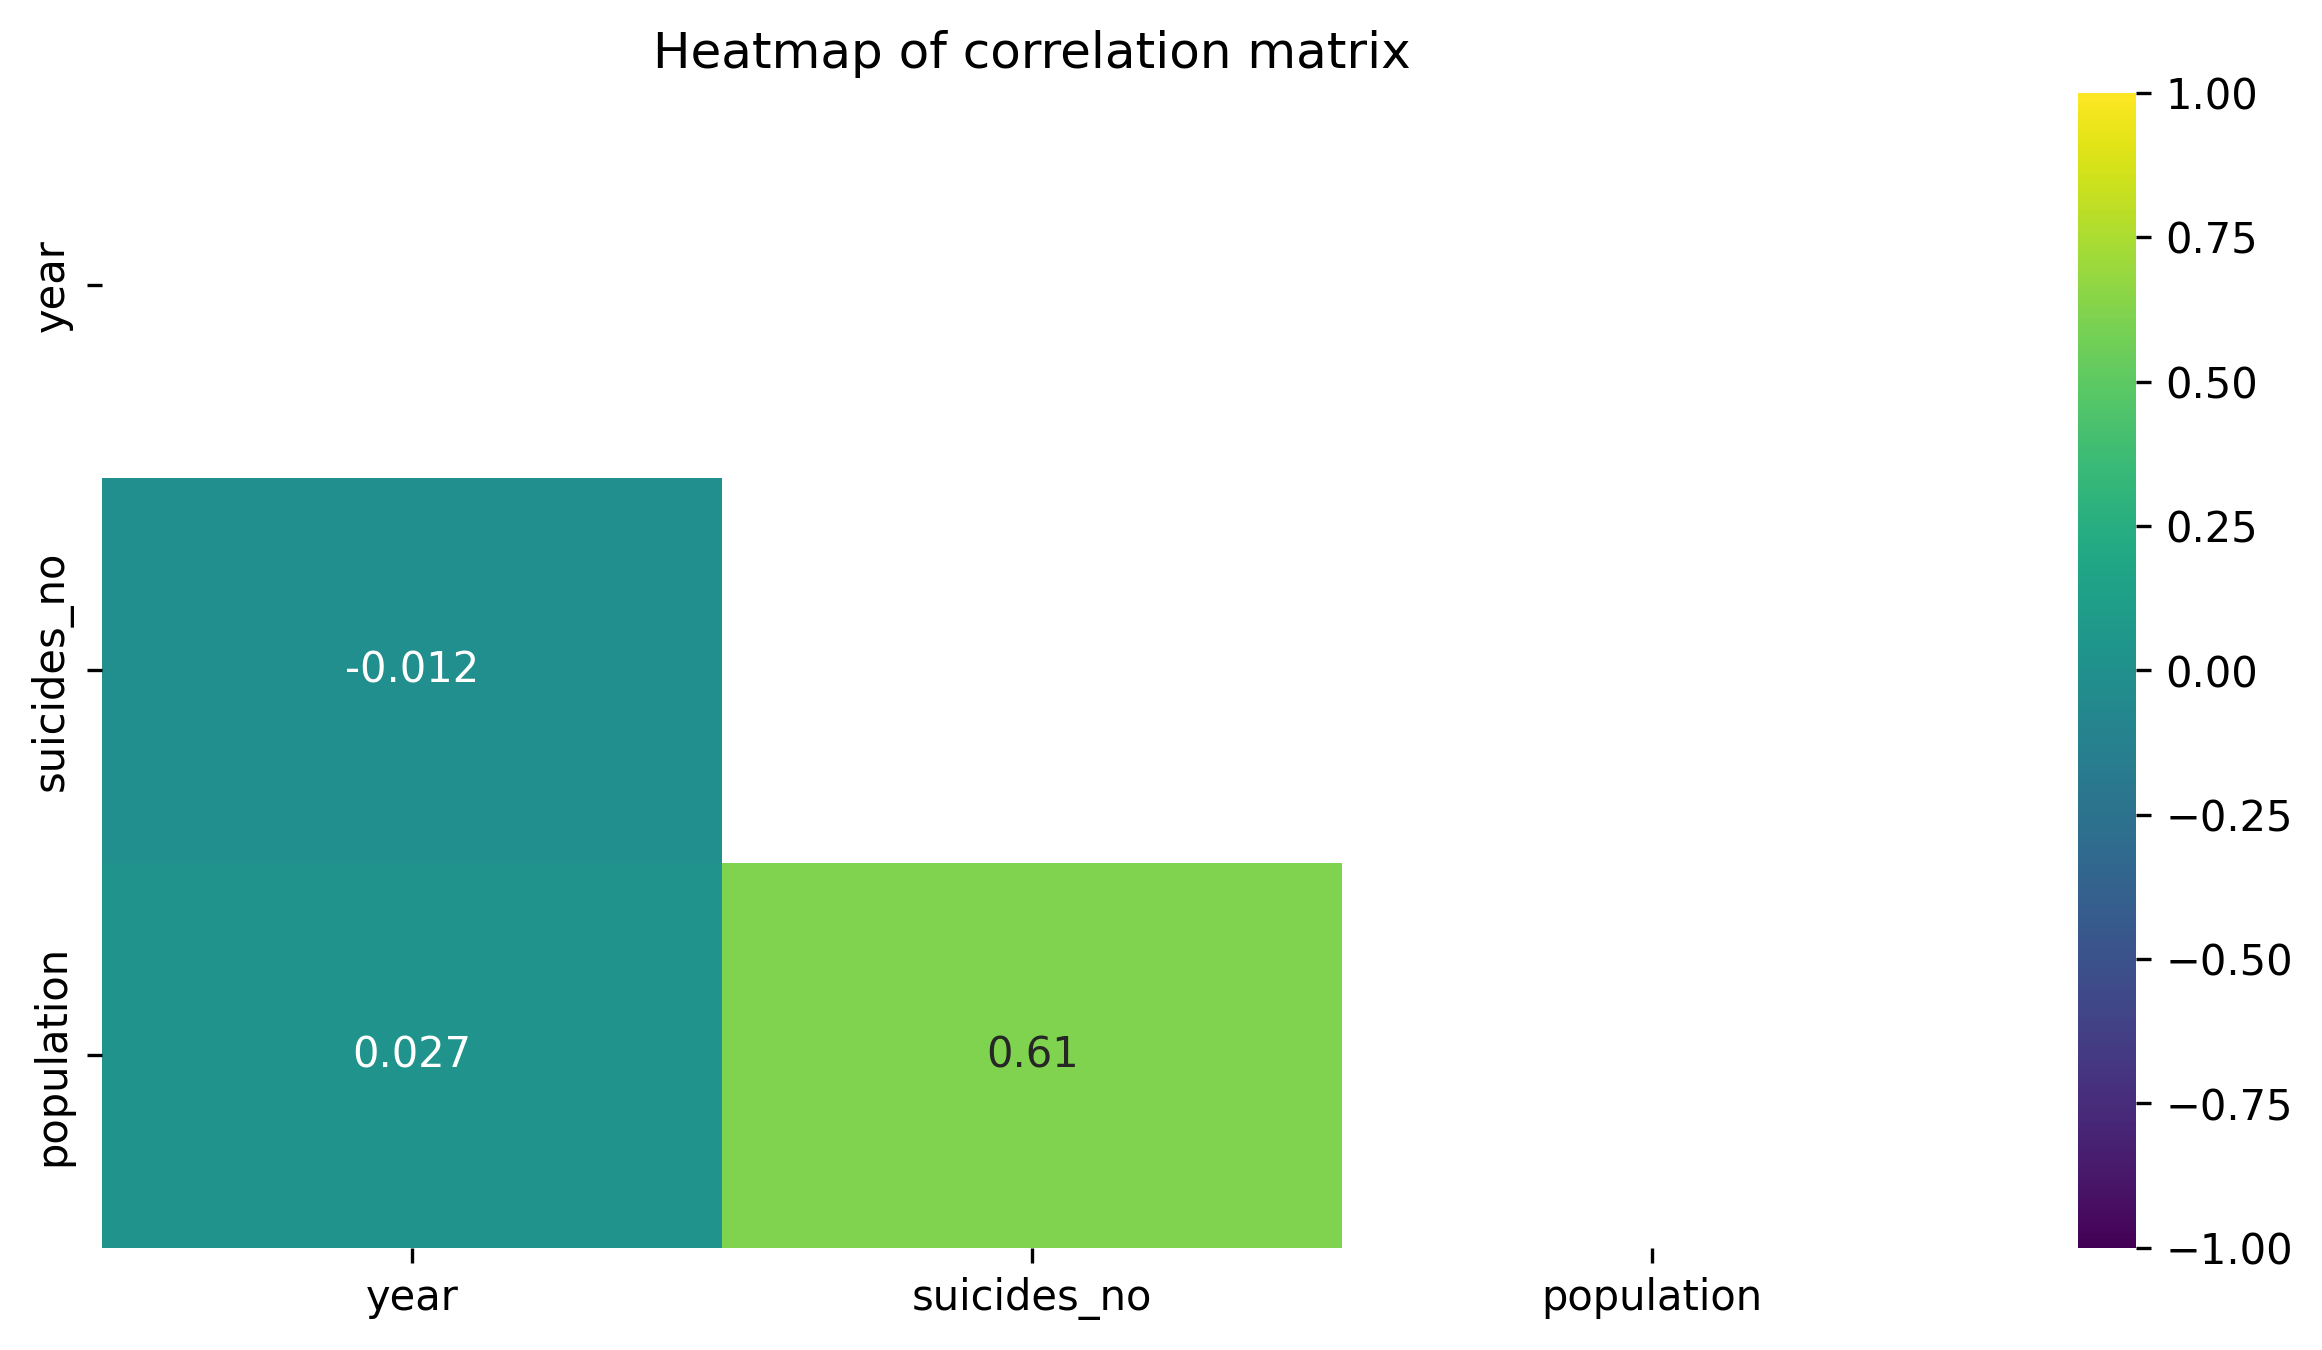

In [260]:
# calling the function to plot the heatmap
heatmap(corr_matrix)


In [261]:
df.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.00
1,Albania,1985,female,25-34 years,NaN,246800.00
2,Albania,1985,female,35-54 years,NaN,267500.00
3,Albania,1985,female,5-14 years,NaN,298300.00
4,Albania,1985,female,55-74 years,NaN,138700.00


<Axes: xlabel='age', ylabel='suicides_no'>

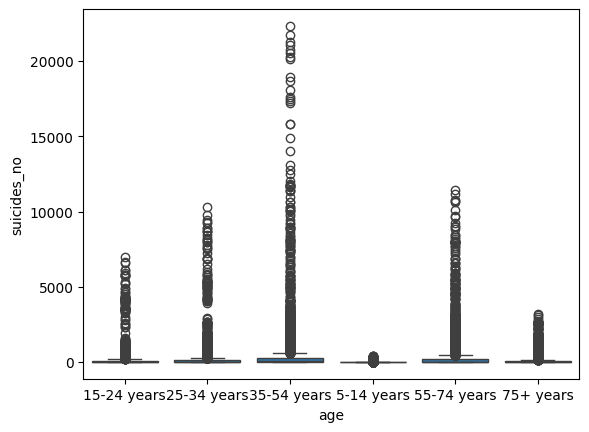

In [271]:
# creating box plot
# plt.subplots(figsize=(10, 5), dpi=300)

sns.boxplot(x='age', y='suicides_no', data=df)

<Axes: xlabel='year', ylabel='suicides_no'>

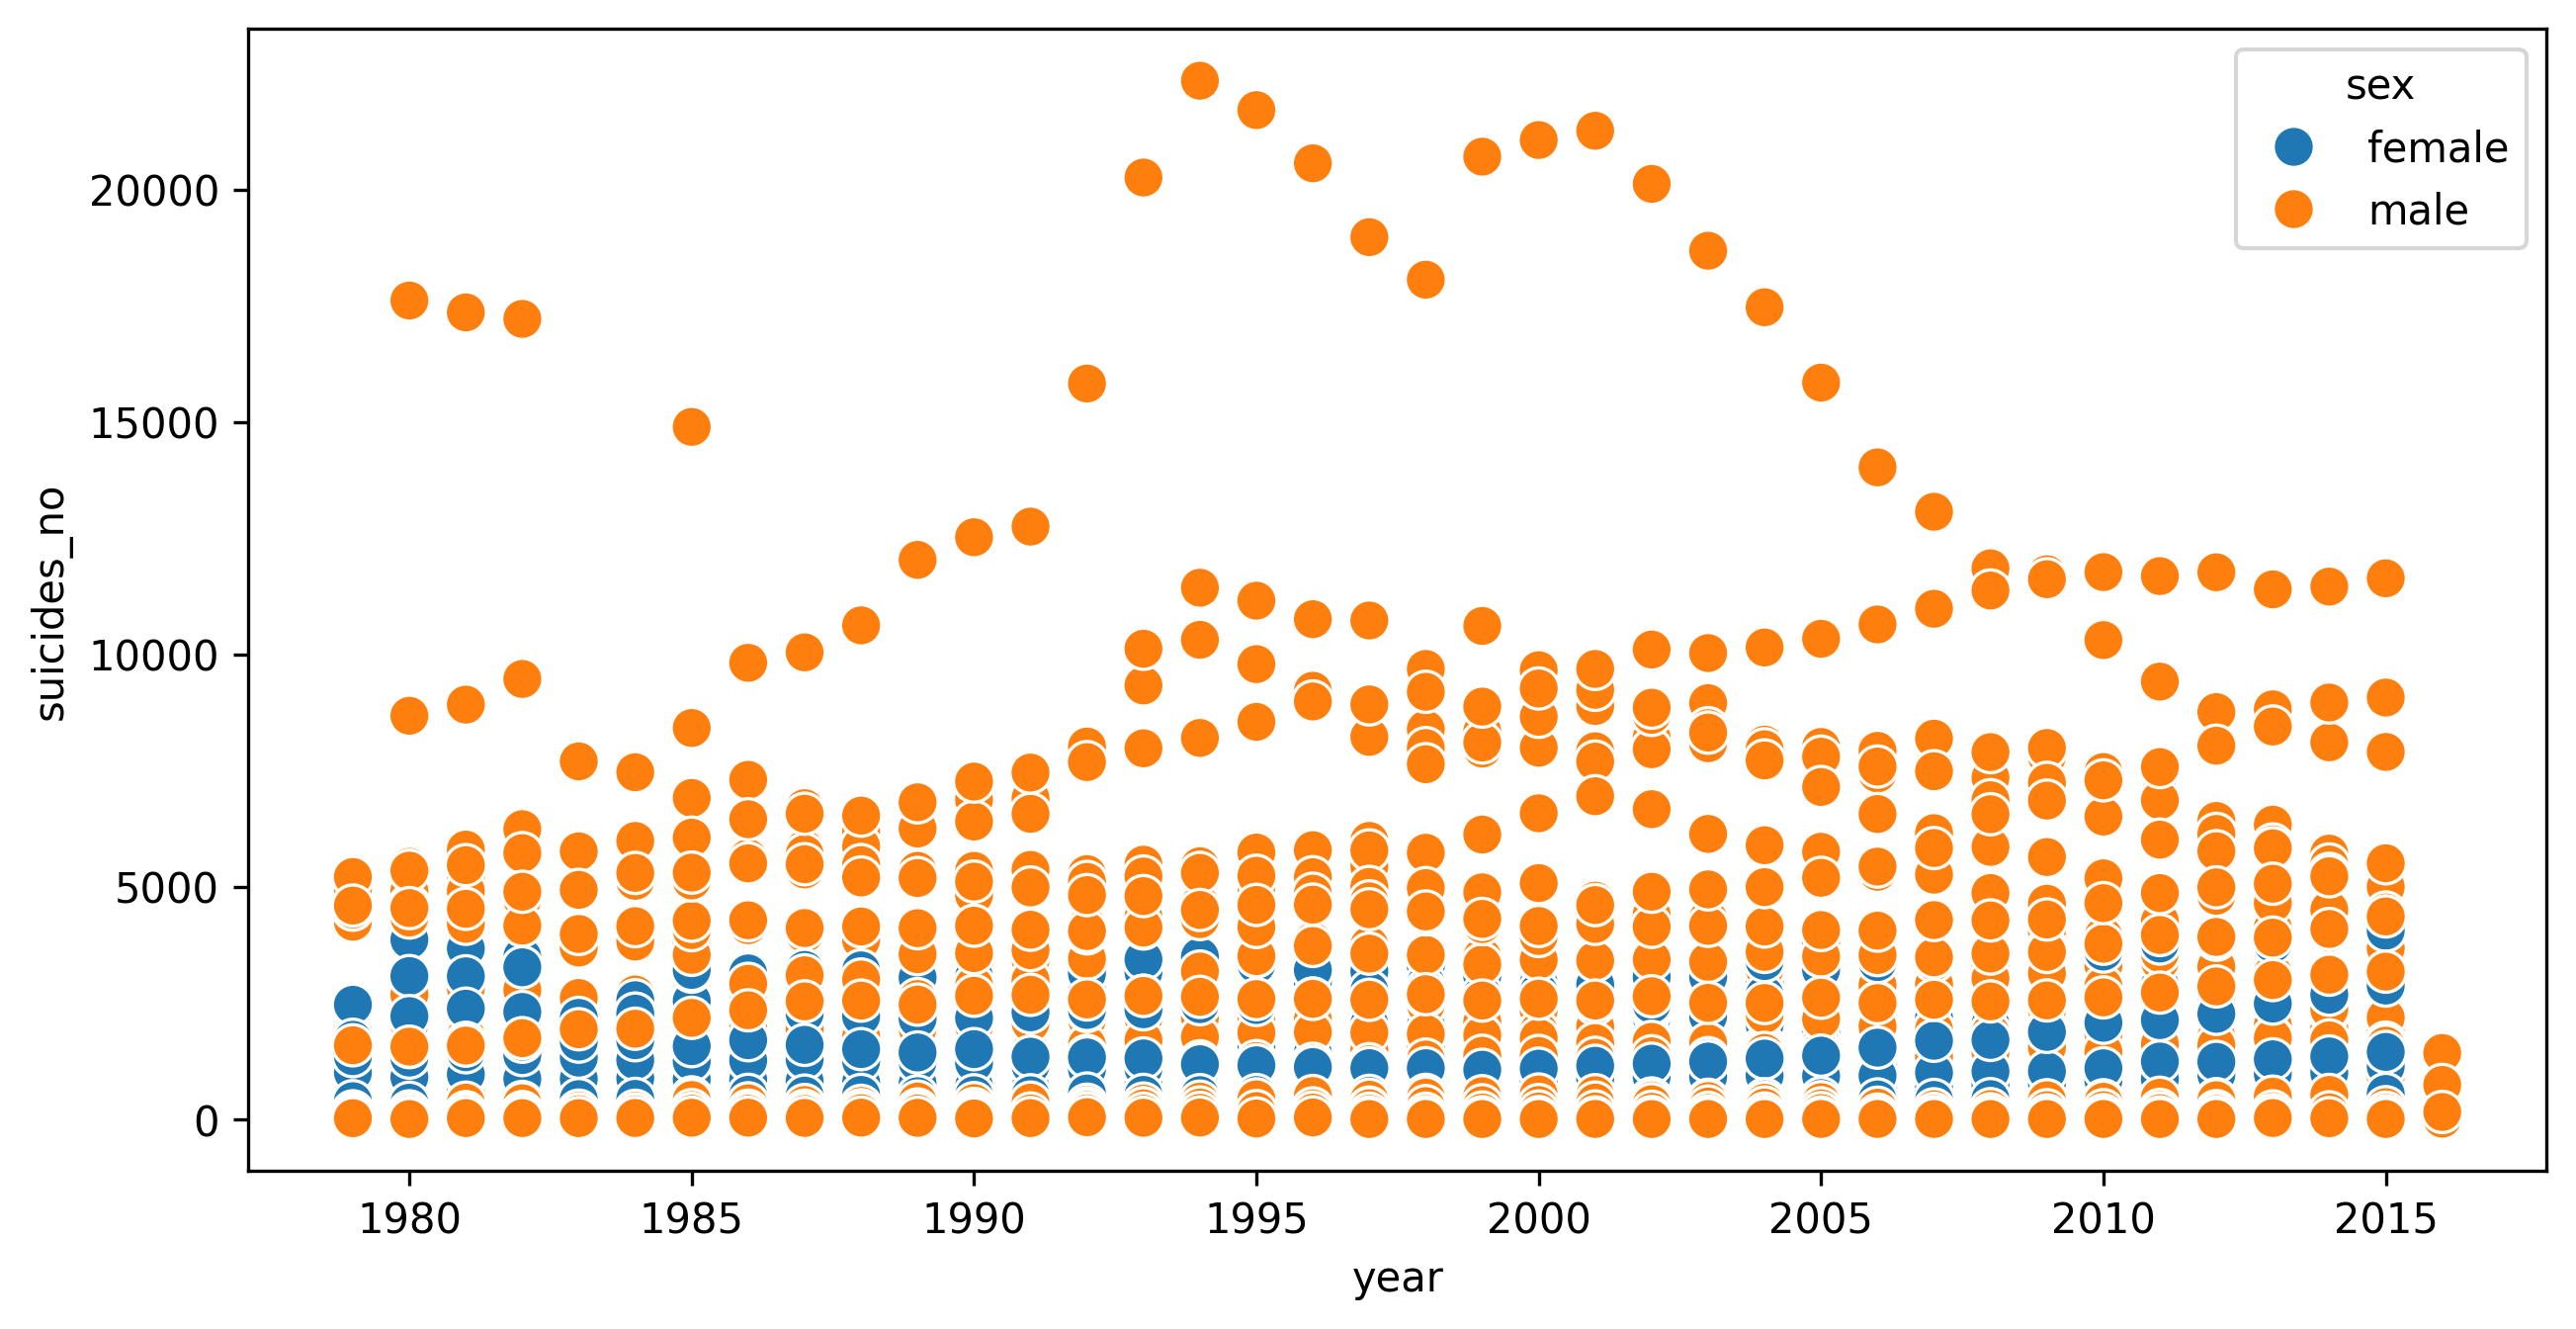

In [223]:
ax , fig = plt.subplots(figsize=(10, 5), dpi=300)

# plotting the scatter plot
sns.scatterplot(y='suicides_no', x='year', data=df, hue='sex', s=100)